# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "clean_data2.csv"
df = pd.read_csv(file_path, sep=',', encoding='cp1252')

df.head(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# переглянемо типи даних для кожного стовпця
print(df.dtypes)

Country Name           object
Region                 object
GDP per capita        float64
Population            float64
CO2 emission          float64
Area                    int64
Population density    float64
dtype: object


Будую графіки

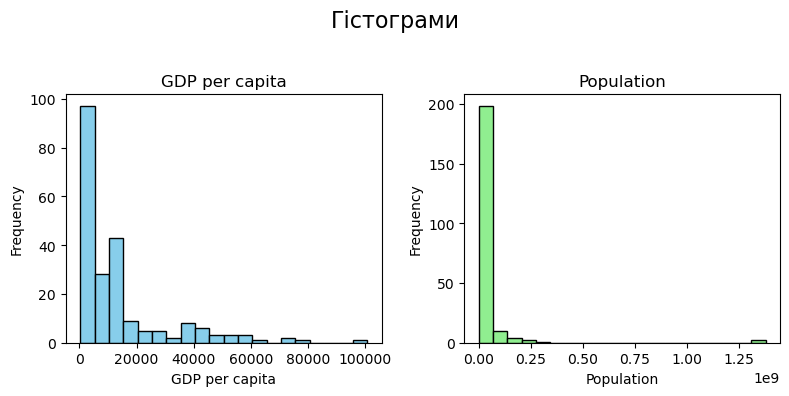

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle('Гістограми', fontsize=16)

# GDP per capita        float64
axs[0].set_title('GDP per capita')  
axs[0].hist(df['GDP per capita'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('GDP per capita')
axs[0].set_ylabel('Frequency')

# Population            float64
axs[1].set_title('Population')  
axs[1].hist(df['Population'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


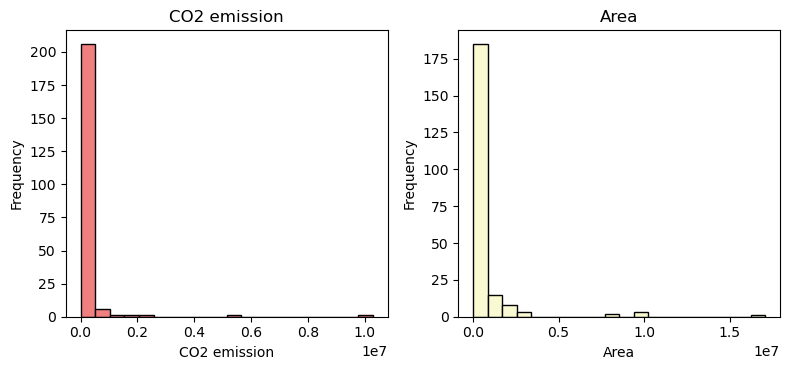

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# CO2 emission          float64
axs[0].set_title('CO2 emission')  
axs[0].hist(df['CO2 emission'], bins=20, color='lightcoral', edgecolor='black')
axs[0].set_xlabel('CO2 emission')
axs[0].set_ylabel('Frequency')

# Area                    int64
axs[1].set_title('Area')  
axs[1].hist(df['Area'], bins=20, color='lightgoldenrodyellow', edgecolor='black')
axs[1].set_xlabel('Area')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

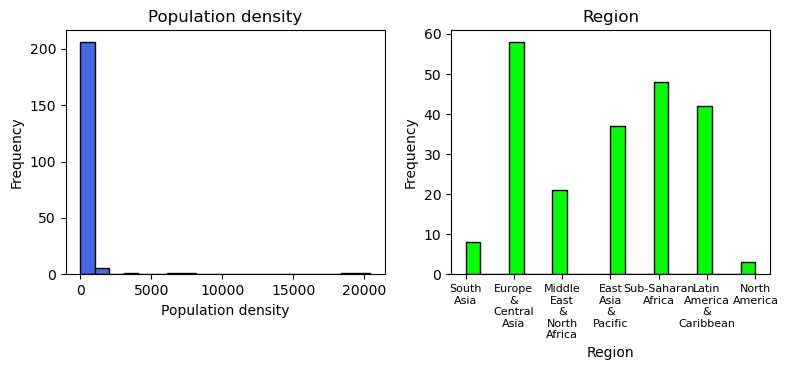

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Population density    float64
axs[0].set_title('Population density')  
axs[0].hist(df['Population density'], bins=20, color='royalblue', edgecolor='black')
axs[0].set_xlabel('Population density')
axs[0].set_ylabel('Frequency')

# Region    object
# Create a copy of the dataframe
df_copy = df.copy()

# Replace spaces in 'Region' with '\n'
df_copy['Region'] = df_copy['Region'].str.replace(' ', '\n')
axs[1].set_title('Region')  
axs[1].hist(df_copy['Region'], bins=20, color='lime', edgecolor='black')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [8]:
correlation_matrix = df[['GDP per capita', 'Population', 
                         'CO2 emission', 'Area', 
                         'Population density']].corr()

print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                    GDP per capita  Population  CO2 emission      Area  \
GDP per capita            1.000000   -0.047759      0.089094  0.063861   
Population               -0.047759    1.000000      0.802232  0.453500   
CO2 emission              0.089094    0.802232      1.000000  0.585512   
Area                      0.063861    0.453500      0.585512  1.000000   
Population density        0.243727   -0.028438     -0.017490 -0.064006   

                    Population density  
GDP per capita                0.243727  
Population                   -0.028438  
CO2 emission                 -0.017490  
Area                         -0.064006  
Population density            1.000000  


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

(0.0, 10806522.673950002)

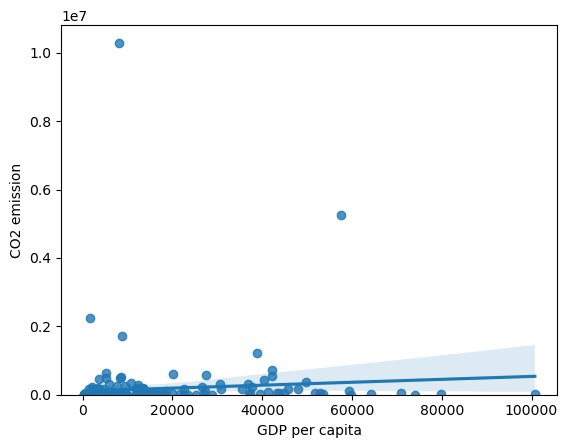

In [9]:
# GDP per capita як потенційний предиктор для CO2 emission
sns.regplot(x='GDP per capita', y='CO2 emission', data=df)
plt.ylim(0,)

(0.0, 11502578.459018497)

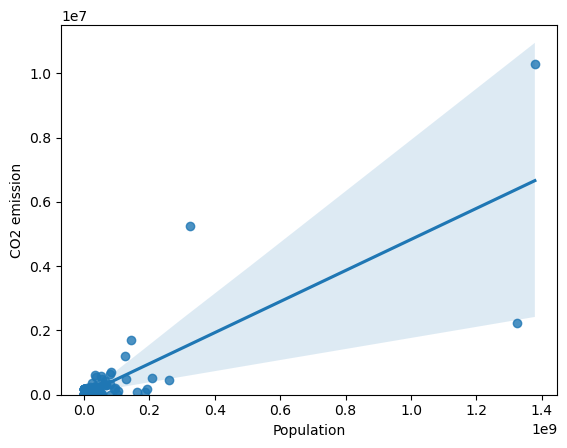

In [10]:
# Population  як потенційний предиктор для CO2 emission
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)

(0.0, 11037459.288590884)

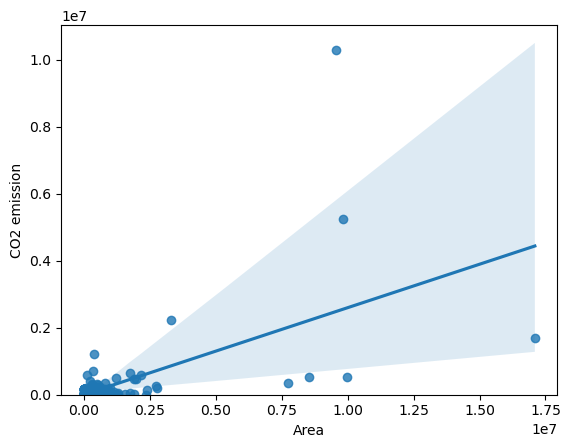

In [11]:
# Area як потенційний предиктор для CO2 emission
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)

(0.0, 10840012.314464413)

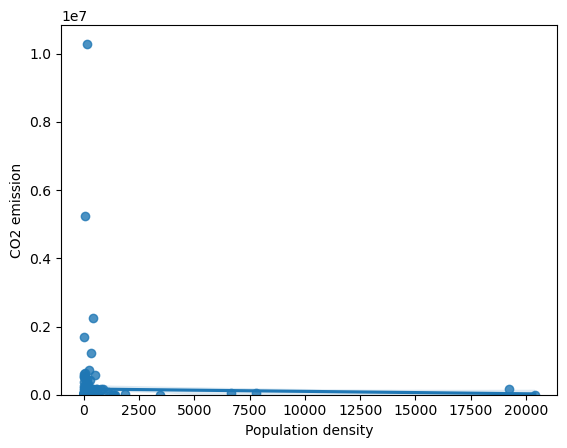

In [12]:
# Population density як потенційний предиктор для CO2 emission
sns.regplot(x='Population density', y='CO2 emission', data=df)
plt.ylim(0,)

Будую діаграму розмаху для 'CO2 emission' по регіонам

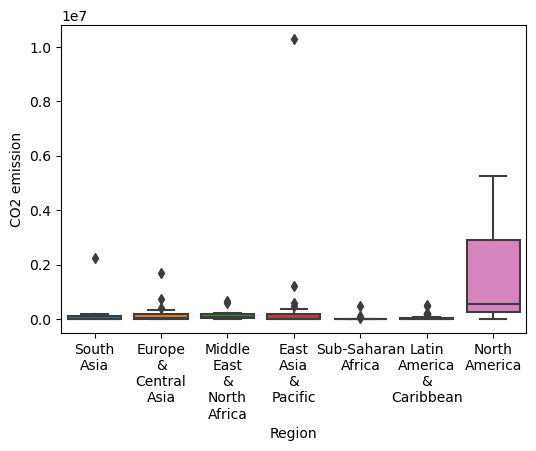

In [13]:
# Create a copy of the dataframe
df_copy = df.copy()
# Replace spaces in 'Region' with '\n'
df_copy['Region'] = df_copy['Region'].str.replace(' ', '\n')
# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='CO2 emission', data=df_copy)
# Show the plot
plt.show()

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

In [14]:
from scipy import stats

In [15]:
# GDP per capita        float64
pearson_coef, p_value = stats.pearsonr(df['GDP per capita'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.08909442180647847  with a P-value of P = 0.19105512270111474


In [16]:
# Population            float64
pearson_coef, p_value = stats.pearsonr(df['Population'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8022315895757172  with a P-value of P = 4.637918023642536e-50


In [17]:
# Area                    int64
pearson_coef, p_value = stats.pearsonr(df['Area'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5855119221735577  with a P-value of P = 2.315747543725288e-21


In [18]:
# Population density    float64
pearson_coef, p_value = stats.pearsonr(df['Population density'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.01749037974279753  with a P-value of P = 0.7978111739090938


<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [19]:
grouped_test=df[['Region', 'CO2 emission']].groupby(['Region'])
grouped_test.head(2)

,Region,CO2 emission
0,South Asia,9809.225000
1,Europe & Central Asia,5716.853000
2,Middle East & North Africa,145400.217000
3,East Asia & Pacific,165114.116337
4,Europe & Central Asia,462.042000
5,Sub-Saharan Africa,34763.160000
6,Latin America & Caribbean,531.715000
7,Latin America & Caribbean,204024.546000
10,East Asia & Pacific,361261.839000
14,Middle East & North Africa,31338.182000


In [20]:
grouped_test.get_group('Middle East & North Africa')['CO2 emission']

2      145400.217000
14      31338.182000
54        722.399000
58     201894.019000
90     649480.705000
91     168443.645000
94      64601.539000
98      26450.071000
105     95408.006000
109     24070.188000
112     56996.181000
123      2346.880000
133     59863.775000
147     61169.227000
158    107853.804000
165    601046.969000
189     30703.791000
197     28829.954000
204    211369.547000
213    165114.116337
214     22698.730000
Name: CO2 emission, dtype: float64

Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [21]:
#CO2 emission for each region
co2_emission_sa = df[df['Region'] == 'South Asia']['CO2 emission']
co2_emission_eu = df[df['Region'] == 'Europe & Central Asia']['CO2 emission']
co2_emission_me = df[df['Region'] == 'Middle East & North Africa']['CO2 emission']
co2_emission_ea = df[df['Region'] == 'East Asia & Pacific']['CO2 emission']
co2_emission_ss = df[df['Region'] == 'Sub-Saharan Africa']['CO2 emission']
co2_emission_la = df[df['Region'] == 'Latin America & Caribbean']['CO2 emission']
co2_emission_na = df[df['Region'] == 'North America']['CO2 emission']

# Perform ANOVA test
f_val, p_val = stats.f_oneway(co2_emission_sa, co2_emission_eu, co2_emission_me,
                               co2_emission_ea, co2_emission_ss, co2_emission_la,
                               co2_emission_na)

# Print ANOVA results
print("ANOVA results: F =", f_val, ", P =", p_val)


ANOVA results: F = 3.567709637673427 , P = 0.0021855506878927606


Результат із 3.567709637673427 показником тесту, який показує  слабку кореляцію, 
і P-value  0.0021855506878927606, що вказує на  статистично значущий результат. 
Але чи означає це, що досліджувані групи корелюють між собою?

Розглянемо їх окремо.

In [22]:
from itertools import combinations

regions = df['Region'].unique()

for region1, region2 in combinations(regions, 2):
    co2_emission_region1 = df[df['Region'] == region1]['CO2 emission']
    co2_emission_region2 = df[df['Region'] == region2]['CO2 emission']
    f_val, p_val = stats.f_oneway(co2_emission_region1, co2_emission_region2)
    print("ANOVA results for", region1, "and", region2, ": F =", f_val, ", P =", p_val)



ANOVA results for South Asia and Europe & Central Asia : F = 2.144988948953664 , P = 0.1479312427557026
ANOVA results for South Asia and Middle East & North Africa : F = 1.0781001825971537 , P = 0.3083326879268249
ANOVA results for South Asia and East Asia & Pacific : F = 0.01580888585558176 , P = 0.90052900845297
ANOVA results for South Asia and Sub-Saharan Africa : F = 7.300524087267293 , P = 0.009192711202178152
ANOVA results for South Asia and Latin America & Caribbean : F = 4.454047216844206 , P = 0.04005521026835715
ANOVA results for South Asia and North America : F = 2.4462636855311657 , P = 0.1522433374176963
ANOVA results for Europe & Central Asia and Middle East & North Africa : F = 0.025434686706224285 , P = 0.8737062957355305
ANOVA results for Europe & Central Asia and East Asia & Pacific : F = 1.442513589456402 , P = 0.23278299644117575
ANOVA results for Europe & Central Asia and Sub-Saharan Africa : F = 7.930055837622809 , P = 0.0058179788422628425
ANOVA results for Europ

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

In [23]:
# По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
regions = df['Region'].unique()
max_diff = 0
max_diff_regions = ()

for region1, region2 in combinations(regions, 2):
    co2_emission_region1 = df[df['Region'] == region1]['CO2 emission']
    co2_emission_region2 = df[df['Region'] == region2]['CO2 emission']
    f_val, p_val = stats.f_oneway(co2_emission_region1, co2_emission_region2)
    if p_val < 0.05:  # Assuming significance level of 0.05
        if abs(co2_emission_region1.mean() - co2_emission_region2.mean()) > max_diff:
            max_diff = abs(co2_emission_region1.mean() - co2_emission_region2.mean())
            max_diff_regions = (region1, region2)

print("Пара регіонів, що відрізняються найсильніше:", max_diff_regions)

Пара регіонів, що відрізняються найсильніше: ('Sub-Saharan Africa', 'North America')


ANOVA results for Low income vs Medium income: F = 2.6479938779111674, P = 0.10517303247970015
ANOVA results for Low income vs High income: F = 0.08245195229683927, P = 0.7743129725670563
ANOVA results for Medium income vs High income: F = 0.5424778663582528, P = 0.46800175793326504
ANOVA results: F = 1.4053421038783798, P = 0.2475374943417103


C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


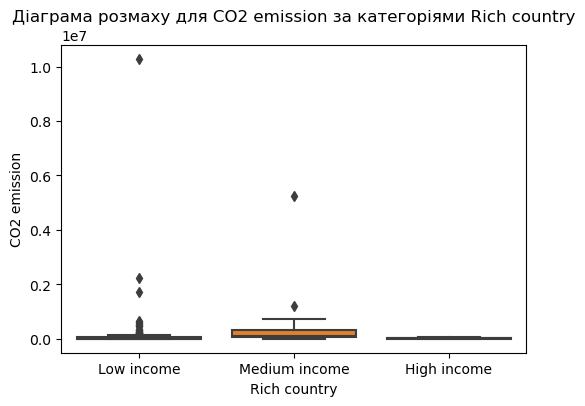

In [24]:
# Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). 
# Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
# Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

categories = ['Low income', 'Medium income', 'High income']
df['Rich country'] = pd.cut(df['GDP per capita'], bins=3, labels=categories)

# ANOVA test for each pair of categories
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        category1 = df[df['Rich country'] == categories[i]]['CO2 emission']
        category2 = df[df['Rich country'] == categories[j]]['CO2 emission']
        f_val, p_val = stats.f_oneway(category1, category2)
        print(f"ANOVA results for {categories[i]} vs {categories[j]}: F = {f_val}, P = {p_val}")

anova_results = [df[df['Rich country'] == category]['CO2 emission'] for category in categories]
f_val, p_val = stats.f_oneway(*anova_results)
print(f"ANOVA results: F = {f_val}, P = {p_val}")

# Create boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.title('Діаграма розмаху для CO2 emission за категоріями Rich country')
plt.xlabel('Rich country')
plt.ylabel('CO2 emission')
plt.show()


<h2>Виконала студентка групи ІП-21 <br>Гордич Оксана</h2>